In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

import matplotlib.pyplot as plt

2023-06-17 17:07:59.519621: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-17 17:07:59.521452: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 17:07:59.557363: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 17:07:59.558103: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 17:08:00.275146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Data Generator
* Load the images and create a dataset generator for training

In [3]:
# Set the directories for the training and validation data
train_dir = 'classifier_dataset/train'
test_dir = 'classifier_dataset/valid'

# Create ImageDataGenerator objects for the training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for the training and validation data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(192, 192),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(192, 192),
    batch_size=32,
    class_mode='binary'
)

Found 6423 images belonging to 2 classes.
Found 2647 images belonging to 2 classes.


In [4]:
c = train_generator.class_indices
classes = list(c.keys())
classes

['0', '1']

In [5]:
x,y = next(train_generator)

print(x.shape, y.shape)

# function to plot images
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(y[i])
        plt.axis("off")
    plt.show()

(32, 192, 192, 3) (32,)


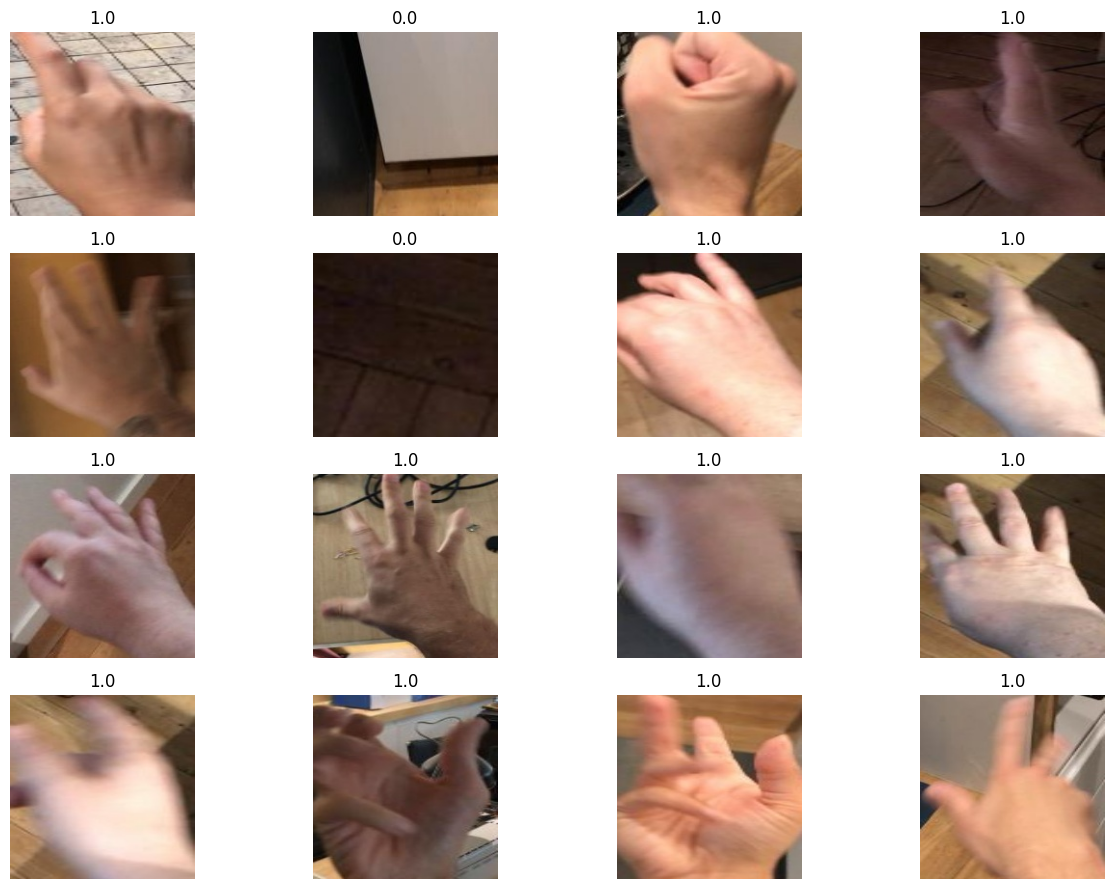

In [6]:
plotImages(x,y)

## Train the model

In [8]:
# Build the model using the functional API
inputs = Input(shape=(192, 192, 3))
x = Flatten()(inputs)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 110592)            0         
                                                                 
 dense (Dense)               (None, 128)               14155904  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,156,033
Trainable params: 14,156,033
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Add callbacks
my_calls = [EarlyStopping(monitor="val_accuracy",patience=10),
            ModelCheckpoint("Classifier_model.h5",verbose= 1 ,save_best_only=True)]

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=val_generator,
    validation_steps=50,
    callbacks = my_calls,
)

Epoch 1/50


2023-06-17 17:08:02.984195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


100/100 [==============================] - ETA: 0s - loss: 3.7606 - accuracy: 0.7809

2023-06-17 17:08:23.696381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



Epoch 1: val_loss improved from inf to 28.99166, saving model to Classifier_model.h5
100/100 [==============================] - 24s 234ms/step - loss: 3.7606 - accuracy: 0.7809 - val_loss: 28.9917 - val_accuracy: 0.5669
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 2.8968 - accuracy: 0.8092
Epoch 2: val_loss improved from 28.99166 to 0.68977, saving model to Classifier_model.h5
100/100 [==============================] - 23s 227ms/step - loss: 2.8968 - accuracy: 0.8092 - val_loss: 0.6898 - val_accuracy: 0.8556
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 0.8089 - accuracy: 0.8744
Epoch 3: val_loss improved from 0.68977 to 0.38282, saving model to Classifier_model.h5
100/100 [==============================] - 18s 178ms/step - loss: 0.8089 - accuracy: 0.8744 - val_loss: 0.3828 - val_accuracy: 0.8950
Epoch 4/50
100/100 [==============================] - ETA: 0s - loss: 0.5743 - accuracy: 0.9000
Epoch 4: val_loss improved from 0.38282 to 0.3

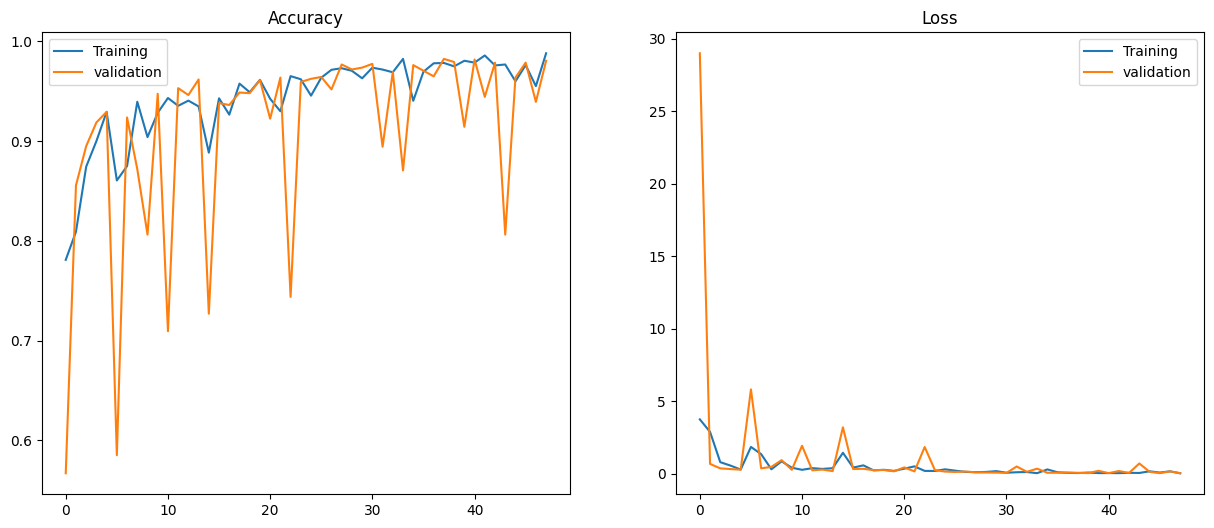

In [23]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(history.epoch,history.history['accuracy'],label = 'Training')
plt.plot(history.epoch,history.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.epoch,history.history['loss'],label = 'Training')
plt.plot(history.epoch,history.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

## Test
* Load the trained model and test on test dataset

In [24]:
trained_model = tf.keras.models.load_model("./classifier/Classifier_model.h5")
trained_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 flatten_2 (Flatten)         (None, 110592)            0         
                                                                 
 dense_4 (Dense)             (None, 156)               17252508  
                                                                 
 dense_5 (Dense)             (None, 1)                 157       
                                                                 
Total params: 17,252,665
Trainable params: 17,252,665
Non-trainable params: 0
_________________________________________________________________


In [25]:
test_df = pd.read_csv("./hand_detection-1/test/_annotations.csv")
test_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,V12_0254_png.rf.0023ac2bbdb7cac3b37e8a97ec4820...,416,416,hand,214,105,308,324
1,V24_0230_png.rf.00540eb40356f9b595ec0910985fcf...,416,416,hand,246,185,348,401
2,V27_0266_png.rf.00a6e41bf03f883a260a3c24b4959f...,416,416,hand,150,171,270,416
3,V29_0479_png.rf.00b74d6c01de5bd5f587baf7a6e062...,416,416,hand,204,172,271,314
4,V9_0454_png.rf.00ddf5a0c41794848c57056b480a4e6...,416,416,hand,137,3,230,177


In [26]:
def load_preprocess():
    # random image
    num = np.random.randint(0, test_df.shape[0])
    
    path = f"./hand_detection-1/test/{test_df['filename'][num]}"
    xmin = test_df['xmin'][num]
    ymin = test_df['ymin'][num]
    xmax = test_df['xmax'][num]
    ymax = test_df['ymax'][num]
    
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
    hand_image = image[ymin:ymax, xmin:xmax]
    hand_image = cv2.resize(hand_image, (192, 192))
    hand_image = np.expand_dims(hand_image, axis=0)
    
    no_hand_image = image[0:ymin, 0:xmin]
    no_hand_image = cv2.resize(no_hand_image, (192, 192))
    no_hand_image = np.expand_dims(no_hand_image, axis=0)

    
    return hand_image, no_hand_image

1/1 [==============================] - 0s 18ms/step
CPU times: user 184 ms, sys: 7.77 ms, total: 192 ms
Wall time: 142 ms


Text(0.5, 1.0, 'Hand, 0.9999999403953552')

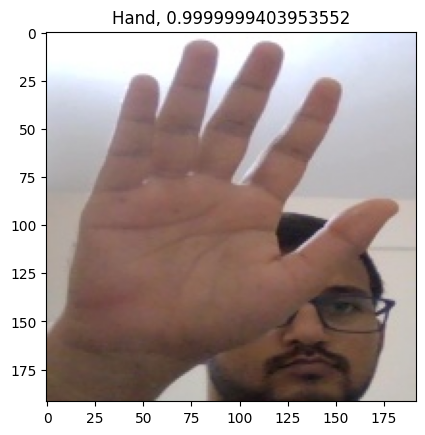

In [27]:
%%time

input_data = cv2.imread("/home/anshal/Downloads/Per/ObjDet/TestImage.jpg")
input_data = cv2.cvtColor(input_data, cv2.COLOR_BGR2RGB) / 255.0
input_data = np.expand_dims(input_data, axis=0)

hand_im, no_hand_im = load_preprocess()

pred_1 = trained_model.predict(input_data)
pred_2 = trained_model.predict(no_hand_im)

class_label = {
    0: "NoHand",
    1: "Hand",
}

plt.imshow(input_data[0])
plt.title(f"{class_label[round(pred_1[0][0])]}, {pred_1[0][0]}")

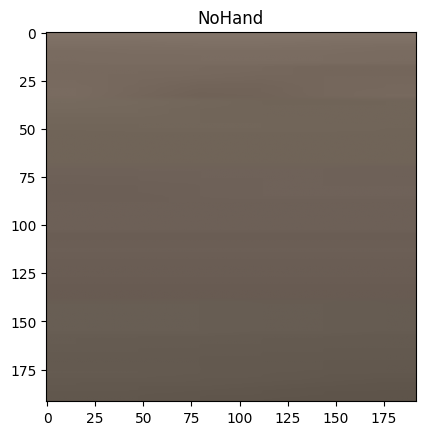

In [28]:
plt.imshow(no_hand_im[0])
plt.title(class_label[round(pred_2[0][0])]);

## Convert to Tflite

In [29]:
# Convert the model to TFLite format with optimizations
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('classifier/classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpxh979x3p/assets


INFO:tensorflow:Assets written to: /tmp/tmpxh979x3p/assets
2023-06-17 17:25:05.440101: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-17 17:25:05.440127: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-06-17 17:25:05.440293: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpxh979x3p
2023-06-17 17:25:05.441224: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-17 17:25:05.441292: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpxh979x3p
2023-06-17 17:25:05.446439: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-06-17 17:25:05.592351: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmpxh979x3p
2023-06-17 17:25:05.602020: I tensorflow/cc/saved_model/loader.cc:314] SavedModel

In [30]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='classifier/classifier.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_details

[{'name': 'serving_default_input_1:0',
  'index': 0,
  'shape': array([  1, 192, 192,   3], dtype=int32),
  'shape_signature': array([ -1, 192, 192,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [31]:
%%time
# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data.astype(np.float32))

# Run inference
interpreter.invoke()

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print the prediction
print('Prediction:', output_data[0][0])

Prediction: 0.99999565
CPU times: user 5.18 ms, sys: 0 ns, total: 5.18 ms
Wall time: 4.38 ms


In [33]:
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 9,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]